In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Problem Statement







* In this project, I am going to analyze a Hotel Reservation dataset. This dataset contains information about a hotel, including factors like nights booked, meal plans, room types, lead time, and more.


* The objective of this project is to explore and analyze the data to discover important factors that govern the booking.


# Dataset Description:


- **Booking_ID:** Unique identifier for each booking.
- **Number of Adults and Children:** Count of adults and children for each booking.
- **Weekend and Week Nights:** Number of nights booked for weekends (Saturday or Sunday) and weekdays (Monday to Friday).
- **Meal Plan:** Type of meal plan chosen by the customer.
- **Car Parking Space:** Indicator of whether the customer requires a car parking space (0 for No, 1 for Yes).
- **Room Type Reserved:** Type of room reserved, encoded by INN Hotels.
- **Lead Time:** Number of days between the date of booking and the arrival date.
- **Arrival Year, Month, and Date:** Temporal details of the arrival date.
- **Market Segment:** Designation of the market segment.
- **Repeated Guest:** Indicator of whether the customer is a repeated guest (0 for No, 1 for Yes).
- **Previous Cancellations:** Number of previous bookings canceled by the customer.
- **Previous Bookings Not Canceled:** Number of previous bookings not canceled by the customer.
- **Average Price per Room:** Average daily price of the reservation (in euros).
- **Special Requests:** Total number of special requests made by the customer.
- **Booking Status:** Binary flag indicating whether the booking was canceled (0 for No, 1 for Yes).

# Oragnizing the data

In [ ]:
data=pd.read_csv("Hotel Reservation.csv")
data.drop("Booking_ID", axis=1, inplace=True)

In [ ]:
data.head(5)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
data.tail(5)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [ ]:
data.shape

(36275, 18)

In [ ]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [ ]:
data.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
data.nunique()

no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       8
no_of_week_nights                         18
type_of_meal_plan                          4
required_car_parking_space                 2
room_type_reserved                         7
lead_time                                352
arrival_year                               2
arrival_month                             12
arrival_date                              31
market_segment_type                        5
repeated_guest                             2
no_of_previous_cancellations               9
no_of_previous_bookings_not_canceled      59
avg_price_per_room                      3930
no_of_special_requests                     6
booking_status                             2
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

#DATA CLEANING

 **Outlier,null value and duplication detection**


In [ ]:
data.duplicated().value_counts()

False    26000
True     10275
dtype: int64

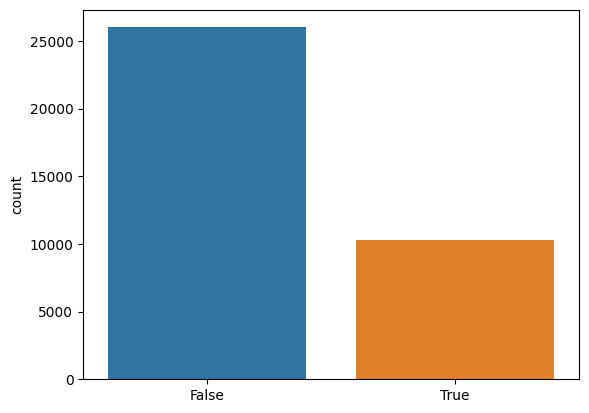

In [ ]:
sns.countplot(x=data.duplicated());

In [ ]:
data=data.drop_duplicates()

In [ ]:
data.shape

(26000, 18)

In [ ]:
data.isnull().sum() #NO NULL VAlUES

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

*There is no null value inthe dataset*

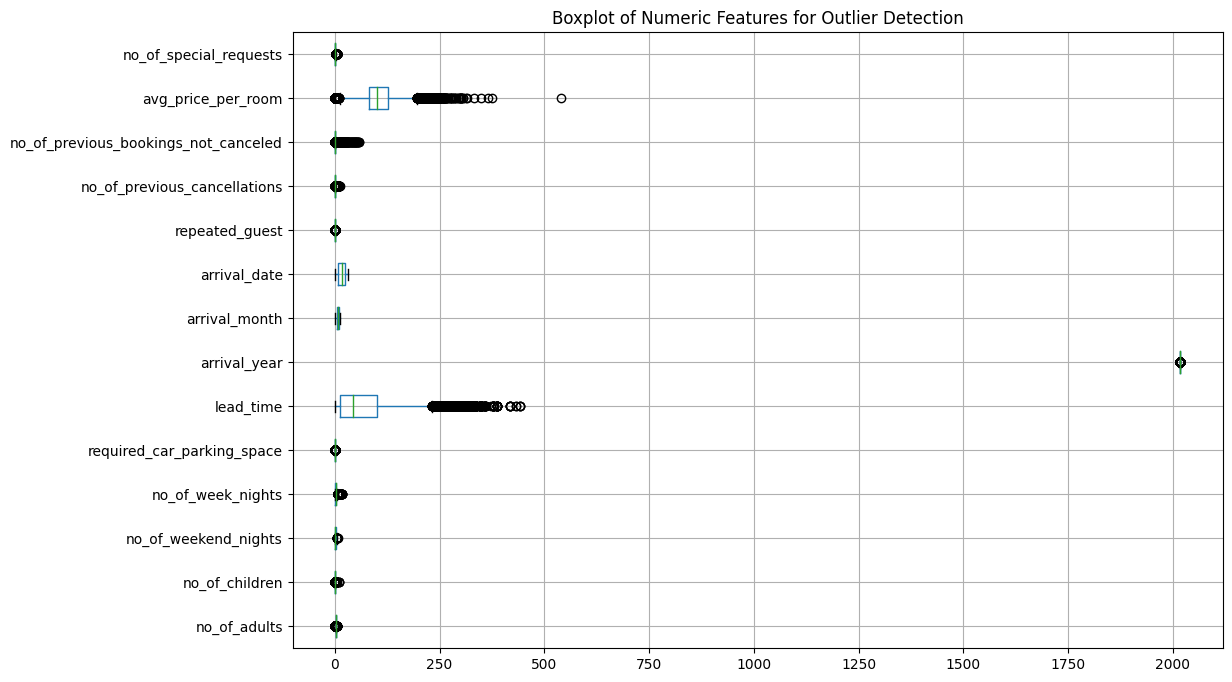

In [ ]:
# Outlier Detection using Boxplots
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
data[numeric_features].boxplot(vert=False)
plt.title('Boxplot of Numeric Features for Outlier Detection')
plt.show()

In [ ]:
from scipy.stats import zscore

# Calculate z-scores for the relevant columns
z_scores = zscore(data[["avg_price_per_room", "lead_time"]])

# Identify outliers
outliers = (z_scores > 3).any(axis=1)

# Drop outliers in place
data.drop(index=data[outliers].index, inplace=True)




**Correlation**

<ipython-input-133-1b935a396e5b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


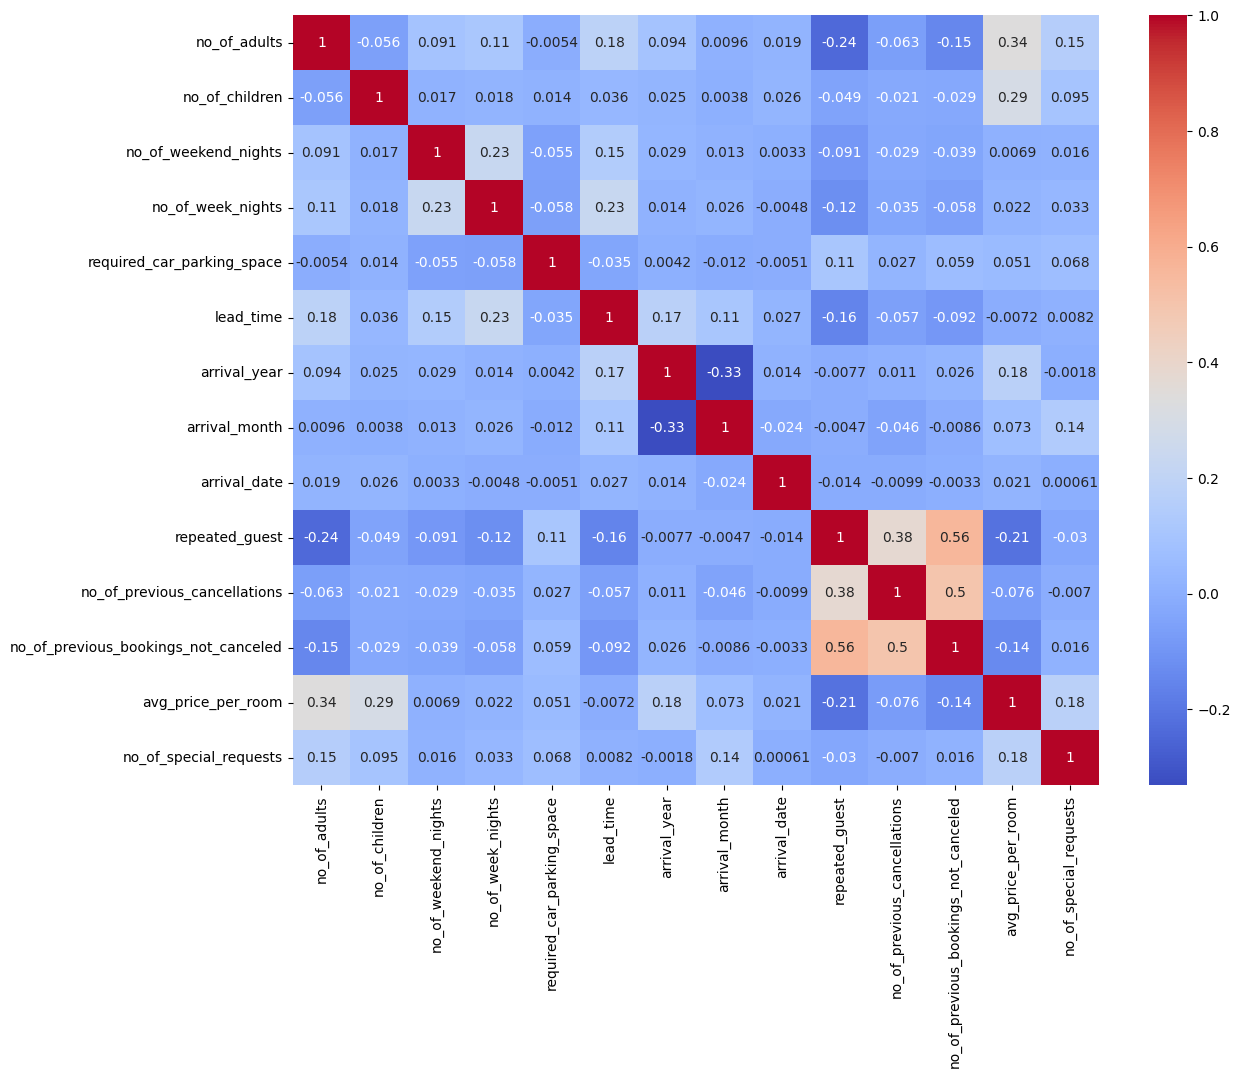

In [ ]:
corr_matrix = data.corr()

plt.figure(figsize=(13, 10))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

# Dataset Visualization

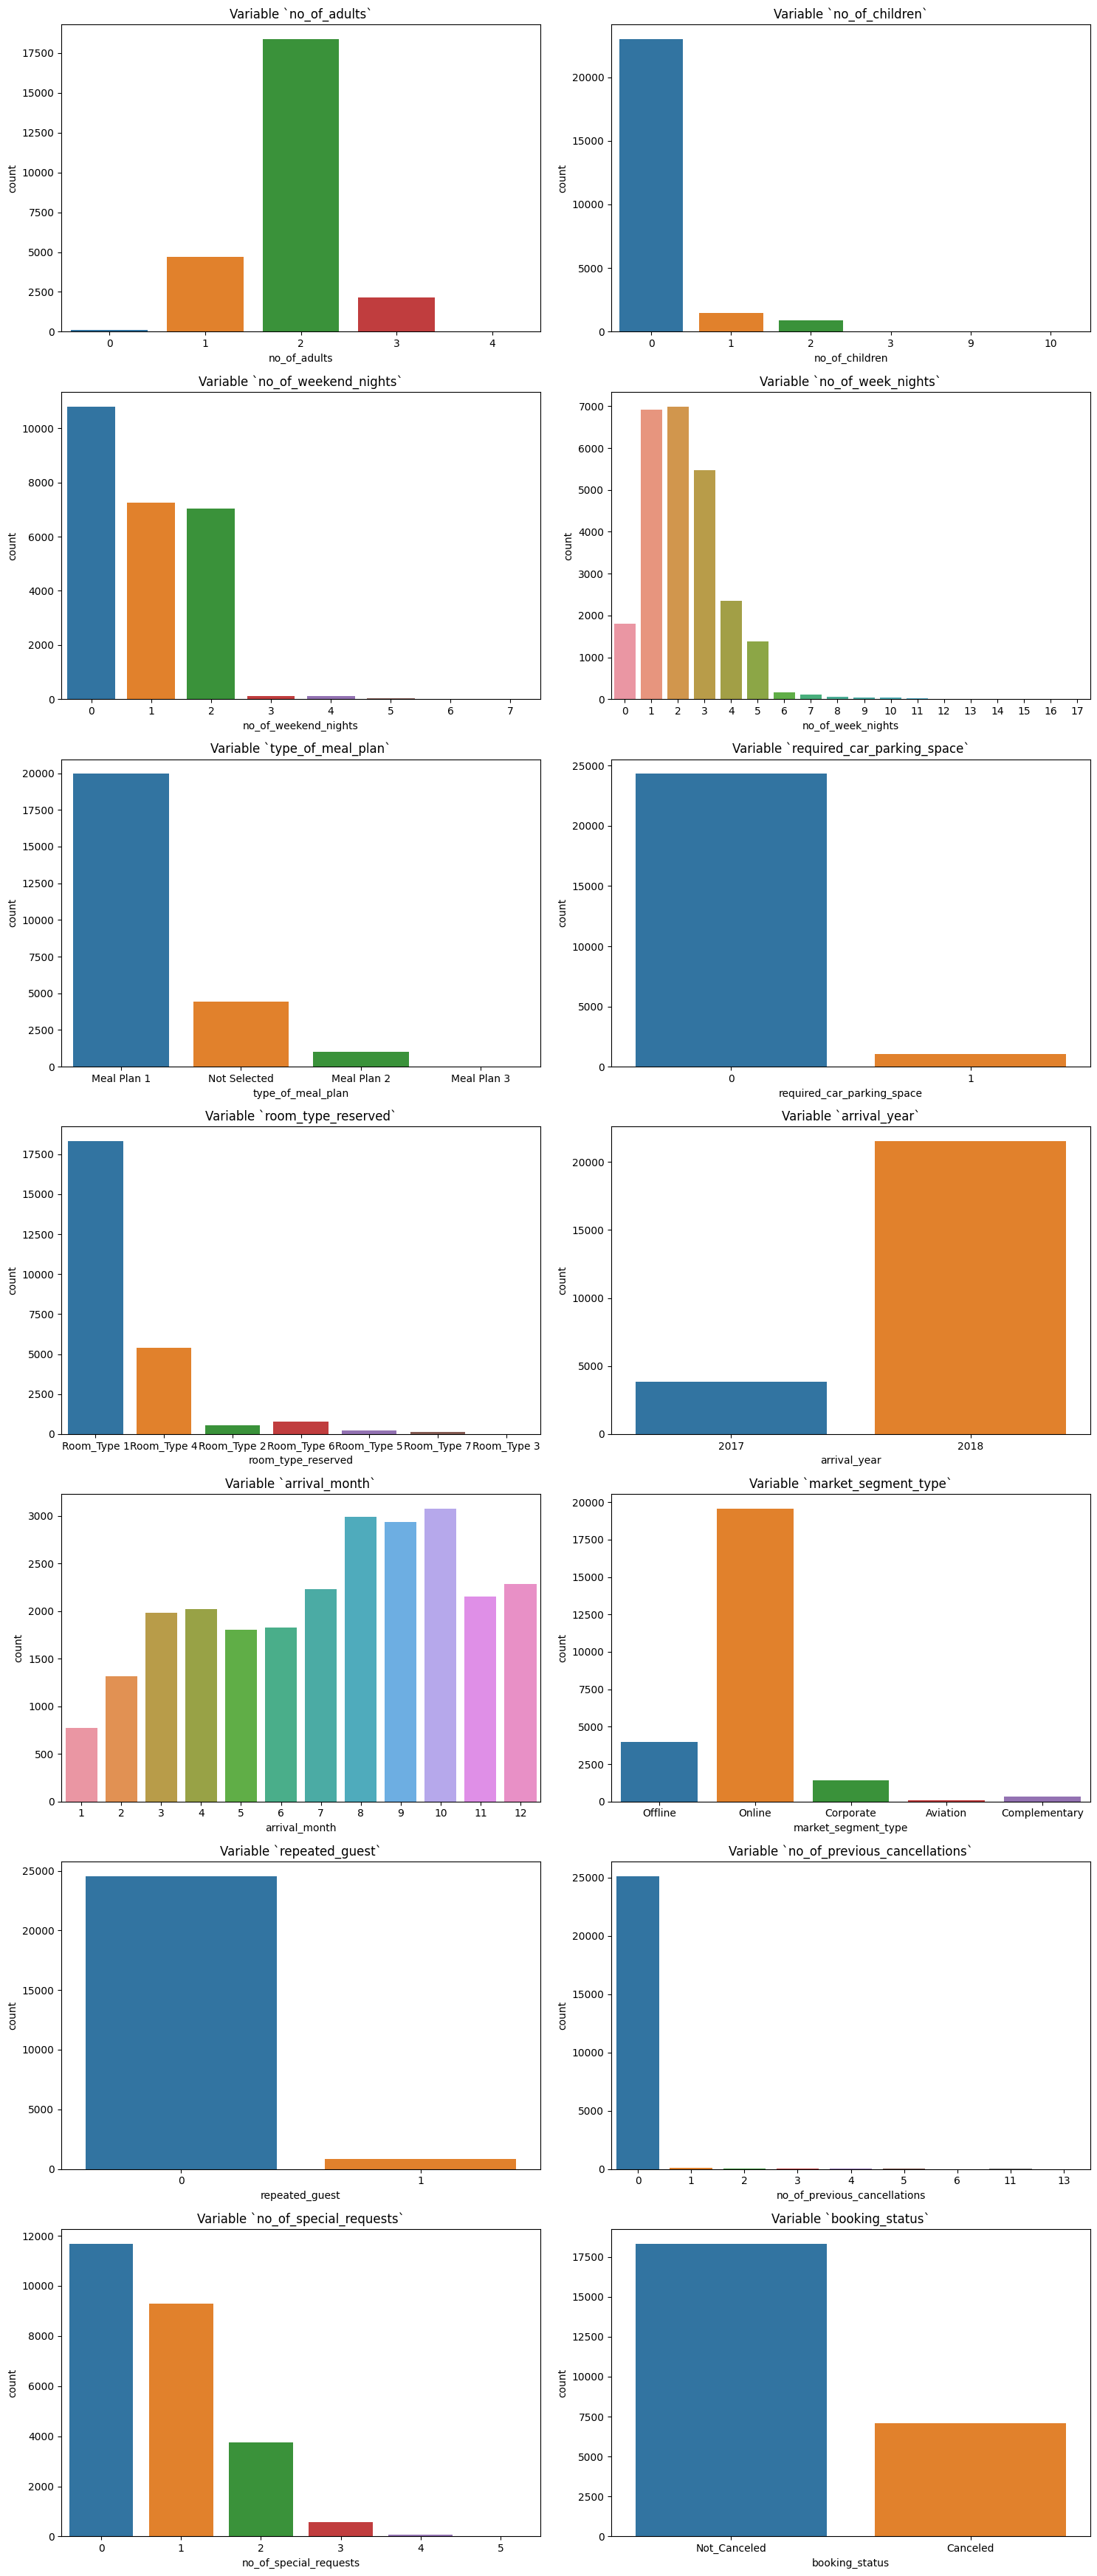

In [ ]:
columns_to_exclude = ["lead_time", "arrival_date",
                      "no_of_previous_bookings_not_canceled",
                      "avg_price_per_room"]

# Drop specified columns
data_subset = data.drop(columns=columns_to_exclude, errors='ignore')

# Calculate the number of rows needed for subplots
num_rows = (len(data_subset.columns) + 1) // 2

# to create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))

axes = axes.flatten()

# Iterate over selected columns
for column, ax in zip(data_subset.columns, axes):
    sns.countplot(data=data_subset, x=column, ax=ax).set(title=f"Variable `{column}`")

plt.tight_layout()
plt.show()


**Observation from the figure:**

- The predominant number of adults per booking is 2.
- Most bookings do not include children (commonly 0).
- The prevalent choice for the number of weekend nights is 0, with 1 and 2 nights also being quite popular.
- The common preference for weeknights is 2, with noticeable popularity for 1 and 3-night stays.
- The first meal plan is widely favored among customers.
- A significant proportion of guests opts not to have a parking space.
- Room type 1 is the most frequently booked.
- Bookings in the year 2018 dominate the dataset.
- Monthly booking patterns show a general increase from January, with slight fluctuations. .
- Online reservations are the most preferred method, followed by offline bookings at the hotel.
- Instances of repeated guests are infrequent.
- The number of previous cancellations is minimal for values greater than 0.
- Special requests have been gradually decreasing, but the most common count is 0.
- Non-cancelled bookings outnumber cancelled ones.


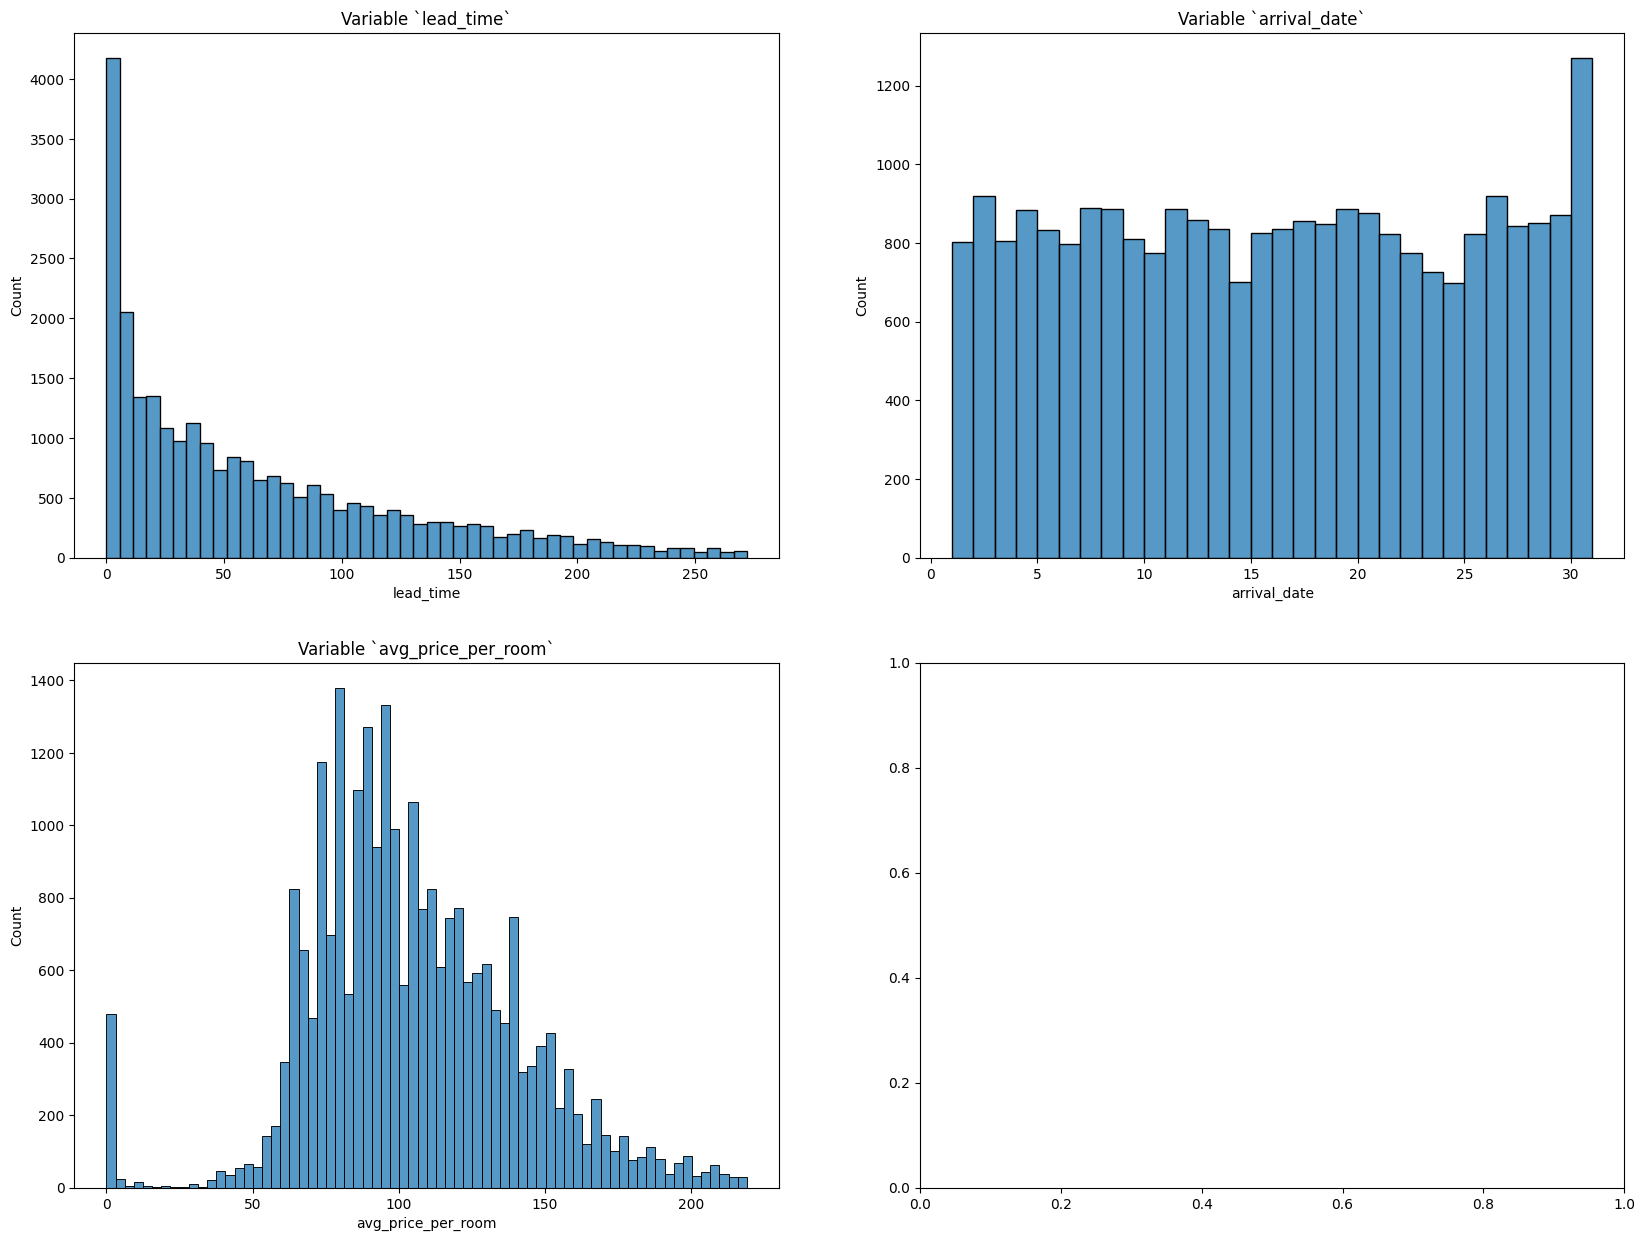

In [ ]:
col = 0
row = 0

fig, ax = plt.subplots(2, 2, figsize=(20, 15))

for column in ["lead_time", "arrival_date", "avg_price_per_room"]:
    sns.histplot(data=data, x=column, ax=ax[row, col]).set(title=f"Variable `{column}`")

    col += 1
    if col > 1:
        row += 1
        col = 0

**Observation:**


The longer it takes to book a room, the lower the number of reservations


There are many average prices for a room between 60 and 120 (looking at it quickly)


Also (for some reason) there are average prices that are 0

# Data Visualization : Based on Booking status

Text(0.5, 0.98, 'Variable `booking_status`')

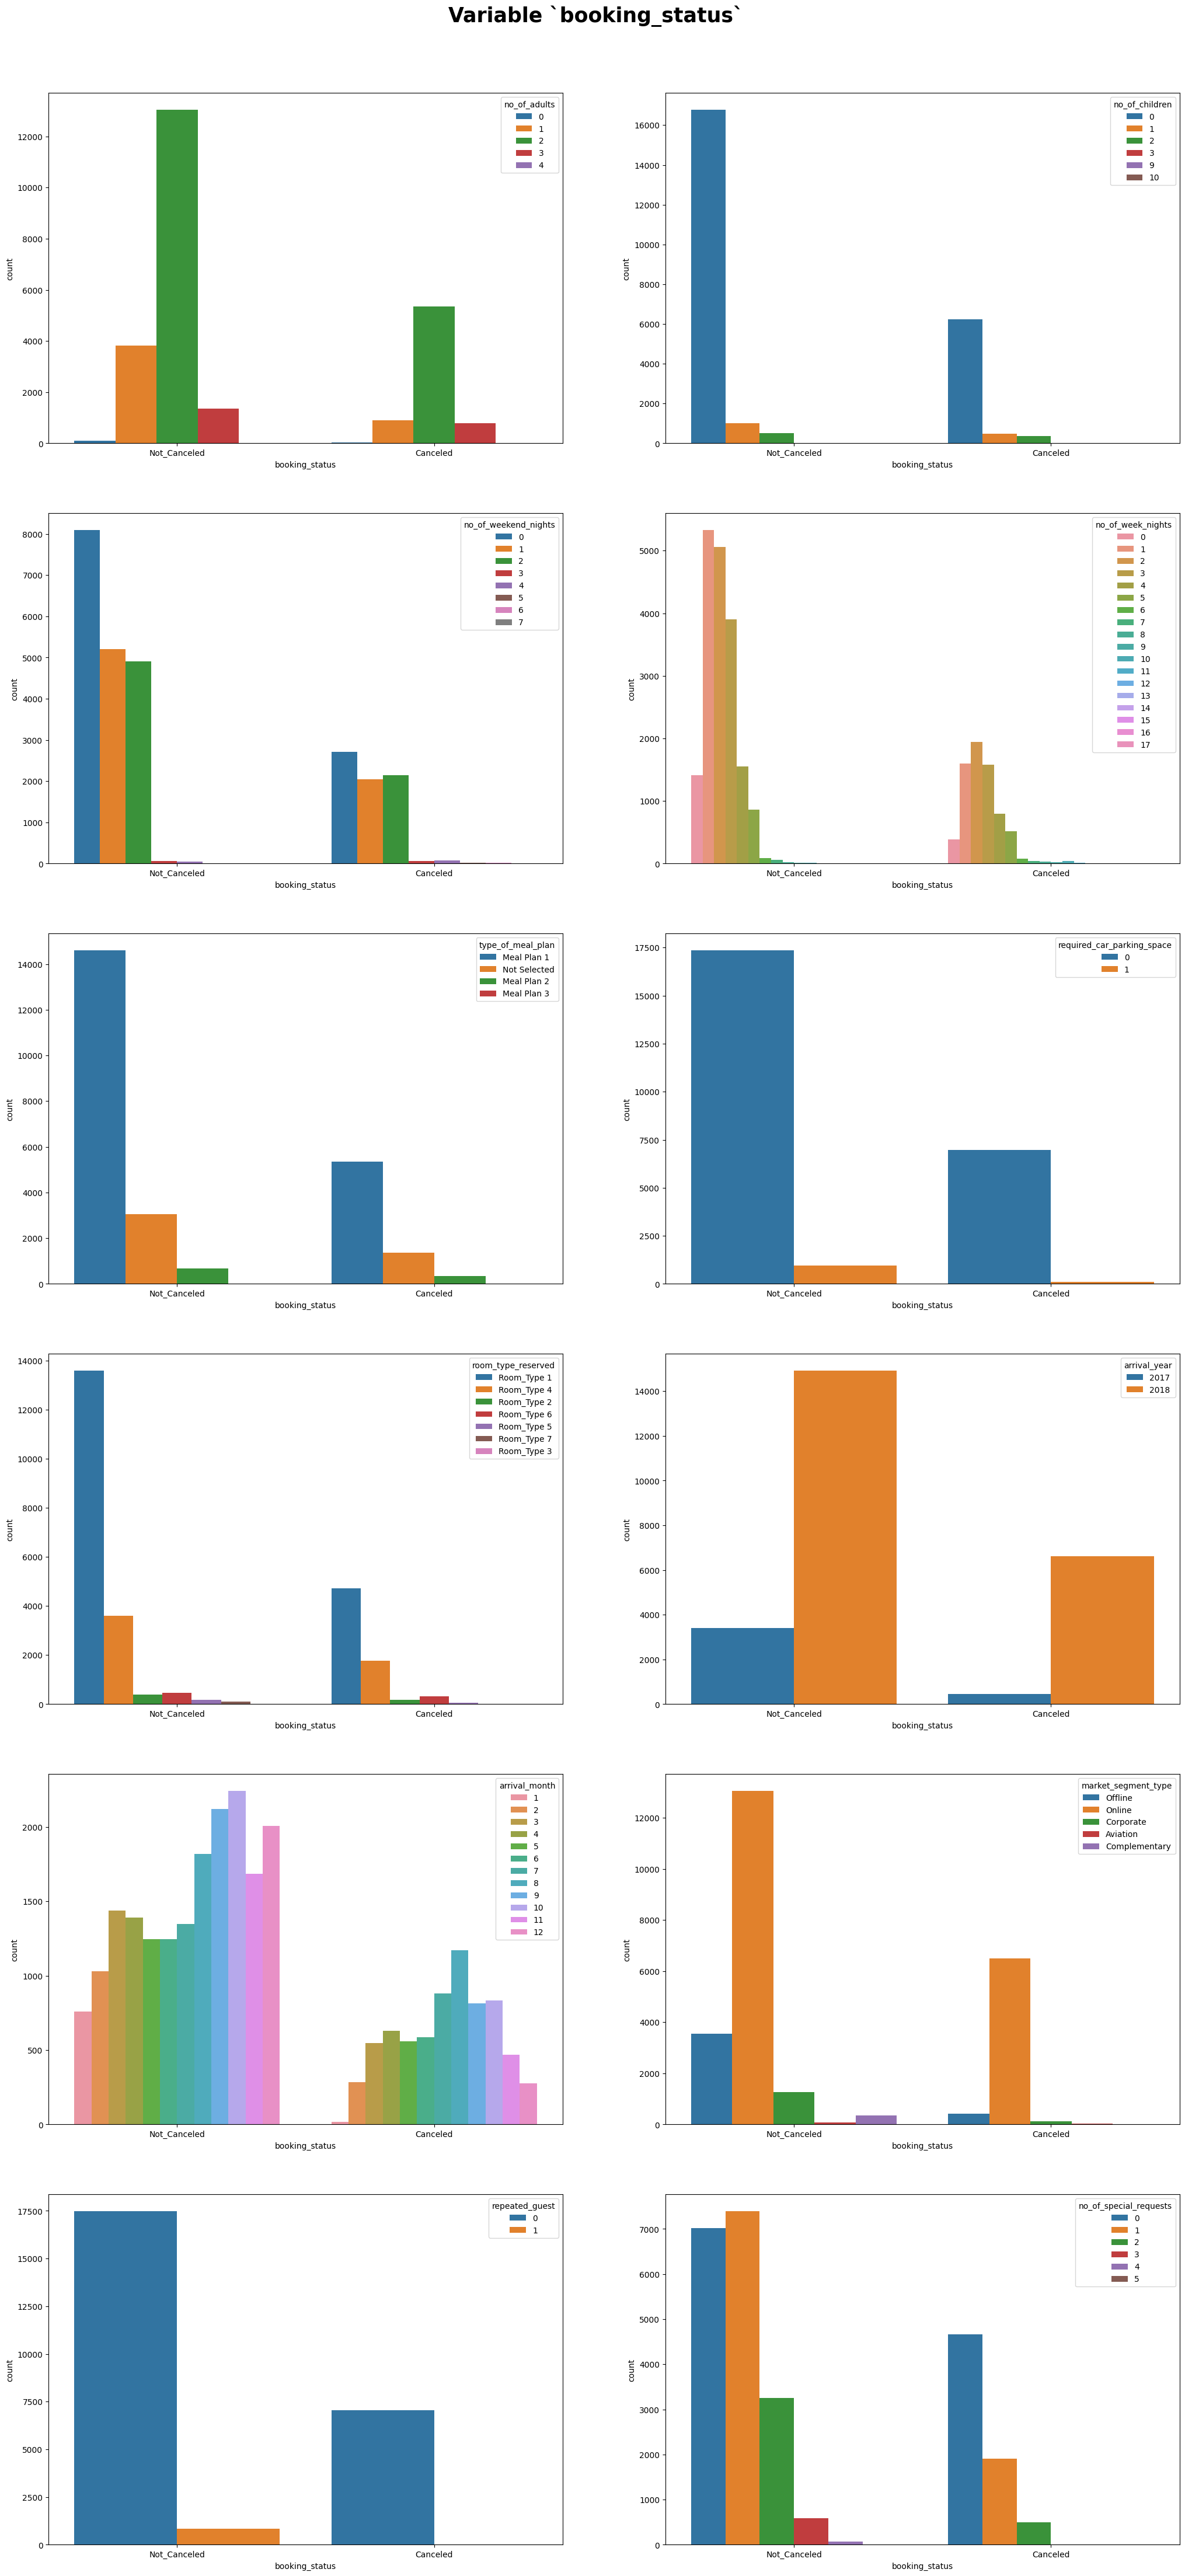

In [ ]:
col = 0
row = 0

fig, ax = plt.subplots(6, 2, figsize=(25, 50))

for column in data.drop(
    [
        "lead_time",
        "arrival_date",
        "no_of_previous_bookings_not_canceled",
        "avg_price_per_room",
        "booking_status",
        "no_of_previous_cancellations"
    ],
    axis=1
).columns:
    sns.countplot(data=data, x="booking_status", hue=column, ax=ax[row, col])

    col += 1
    if col > 1:
        row += 1
        col = 0

fig.subplots_adjust(top=0.95)
plt.suptitle("Variable `booking_status`", fontweight="bold", fontsize=25)

<ipython-input-137-0a773d43c409>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
<ipython-input-137-0a773d43c409>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
<ipython-input-137-0a773d43c409>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
<ipython-input-137-0a773d43c409>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


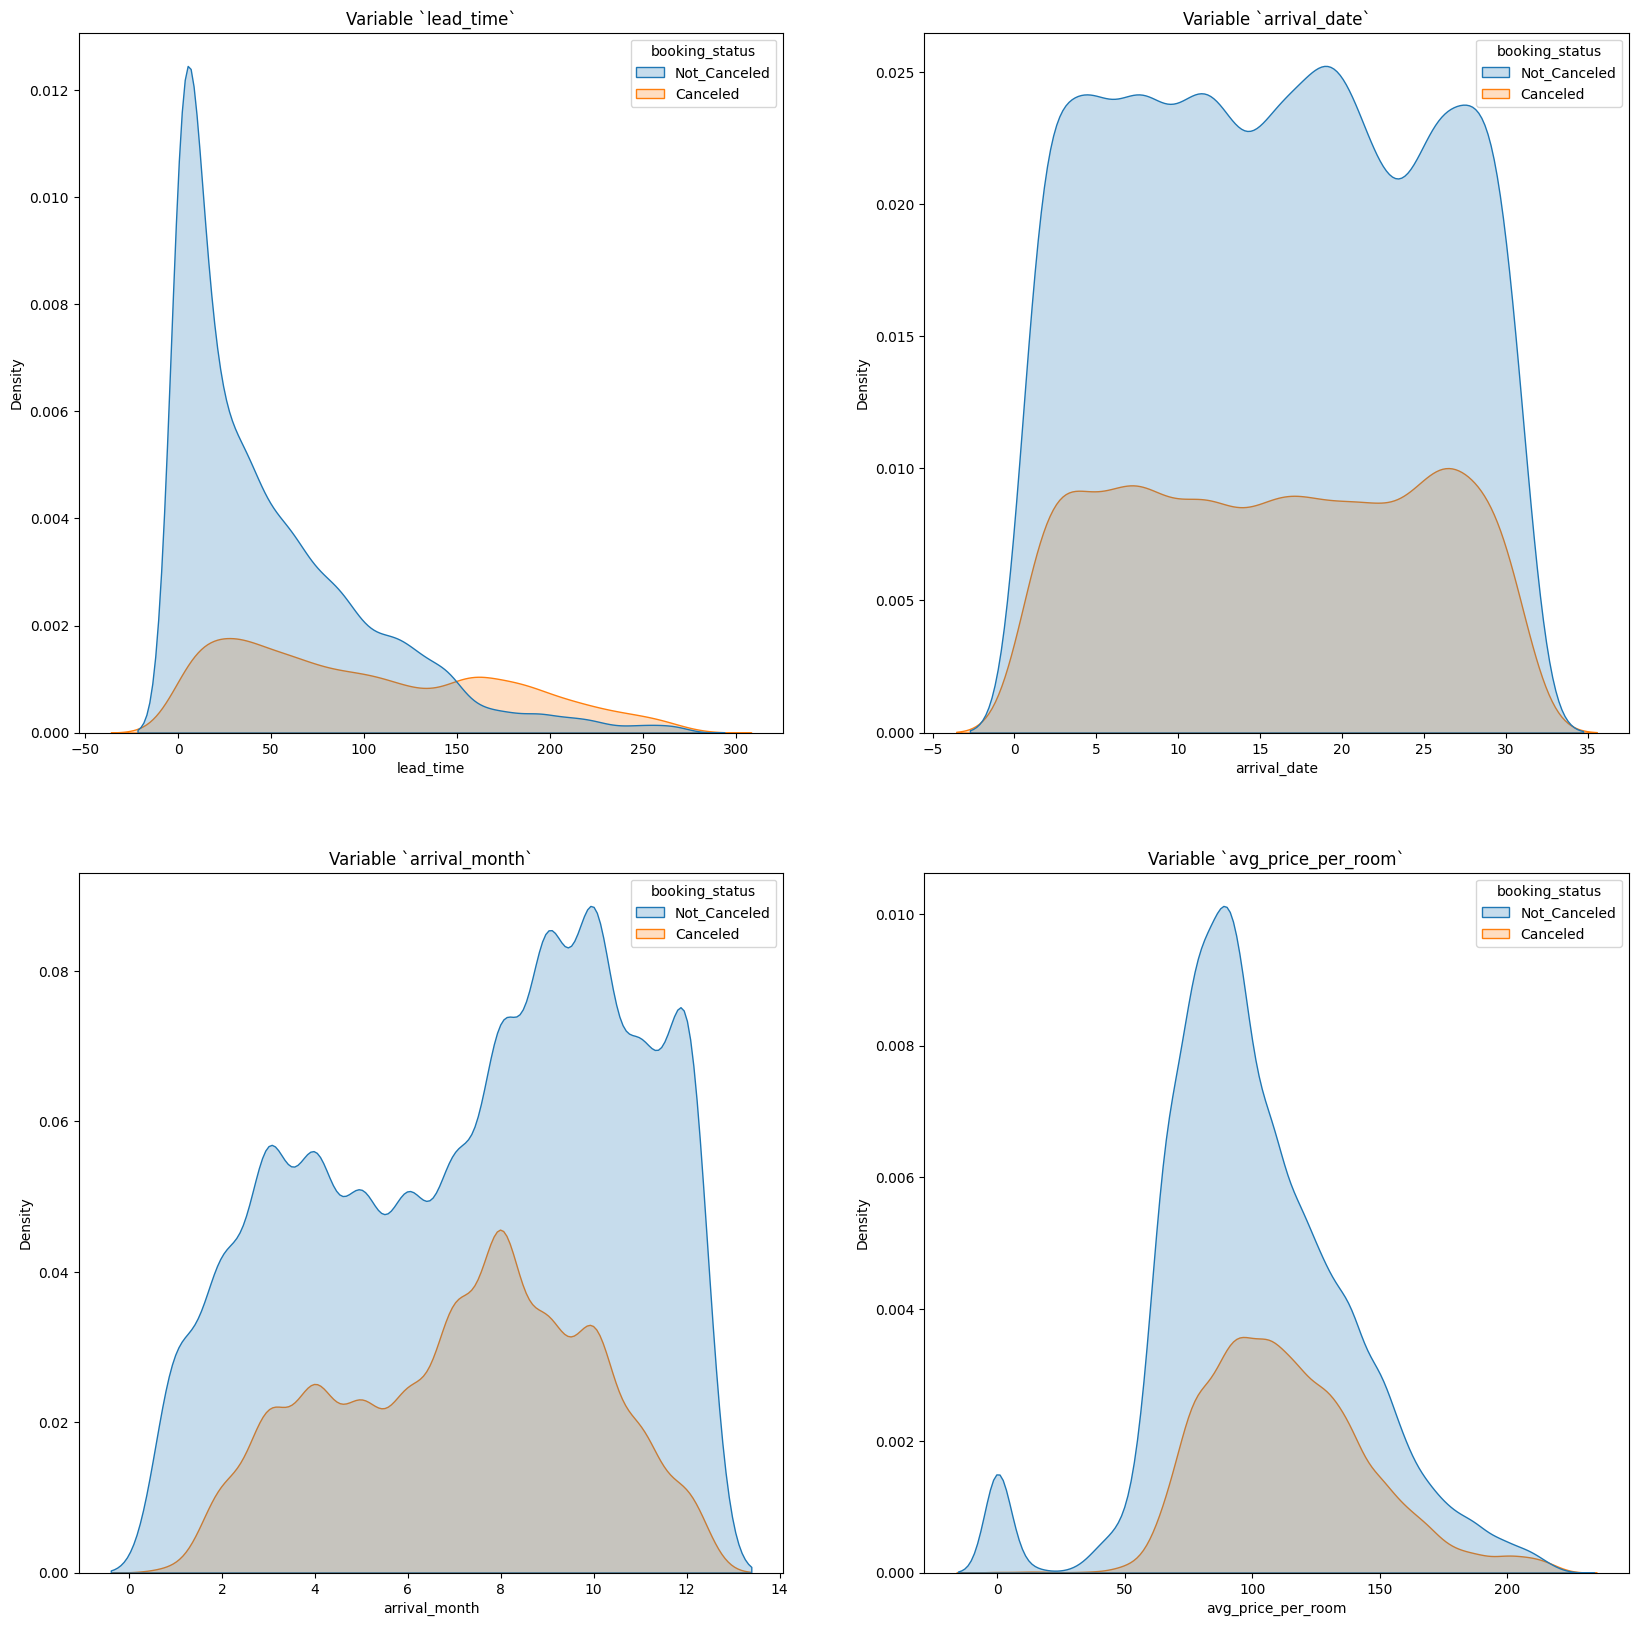

In [ ]:
col = 0
row = 0

fig, ax = plt.subplots(2, 2, figsize=(20, 20))

for column in ["lead_time", "arrival_date", "arrival_month", "avg_price_per_room"]:
    sns.kdeplot(
        data=data, x=column, ax=ax[row, col], hue="booking_status", shade=True
    ).set(title=f"Variable `{column}`")

    col += 1
    if col > 1:
        row += 1
        col = 0

**Observation:**

The variable lead_time had a clear difference between cancelled and non-cancelled. We need to look deeper in this case


This clear difference does not seem to be present in the three other variables

<ipython-input-138-f5e6672c7a12>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x="lead_time", ax=ax[row, col], hue=column, shade=True).set(
<ipython-input-138-f5e6672c7a12>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x="lead_time", ax=ax[row, col], hue=column, shade=True).set(
<ipython-input-138-f5e6672c7a12>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x="lead_time", ax=ax[row, col], hue=column, shade=True).set(
<ipython-input-138-f5e6672c7a12>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14

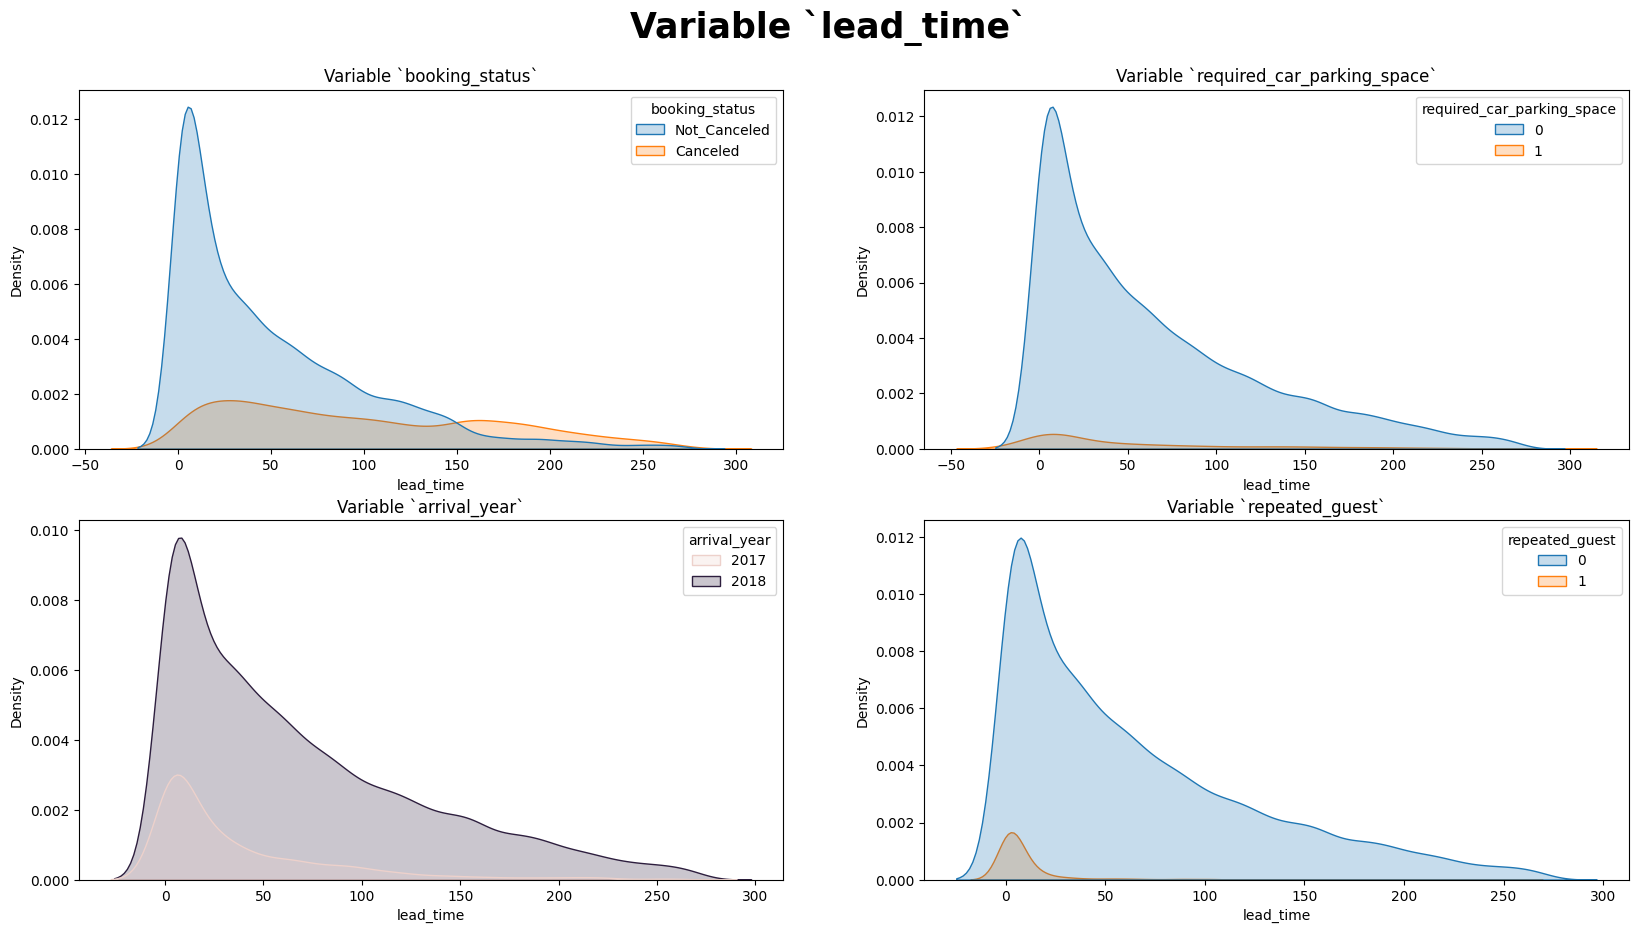

In [ ]:
col = 0
row = 0

fig, ax = plt.subplots(2, 2, figsize=(20, 10))

for column in [
    "booking_status",
    "required_car_parking_space",
    "arrival_year",
    "repeated_guest",
]:
    sns.kdeplot(data=data, x="lead_time", ax=ax[row, col], hue=column, shade=True).set(
        title=f"Variable `{column}`"
    )

    col += 1
    if col > 1:
        row += 1
        col = 0

fig.subplots_adjust(top=0.90)
plt.suptitle("Variable `lead_time`", fontweight="bold", fontsize=25)
plt.show()

We can see the same pattern for all four charts. The longer it takes to book, the lower the numbers.

In the required_car_parking_space and repeated_guest variables, it can be seen that customers required a parking space more often or were there multiple times in a shorter time (low value of the lead_time variable).

# How often do repeated guest cancel the booking?


In [ ]:
data["repeated_guest"].unique()

array([0, 1])

In [ ]:
repeated_guest_percentage = data['repeated_guest'].value_counts(normalize=True) * 100


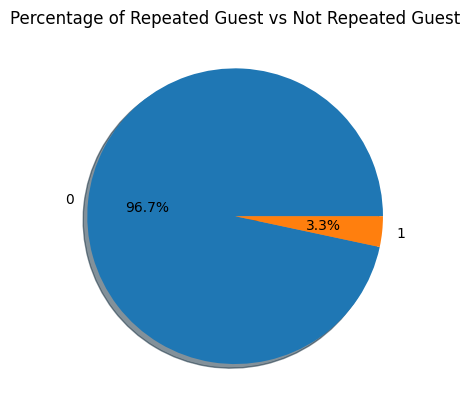

In [ ]:
plt.pie(repeated_guest_percentage, labels=repeated_guest_percentage.index, autopct='%1.1f%%', shadow=True)
plt.title("Percentage of Repeated Guest vs Not Repeated Guest")
plt.show()

**Observation:**<br>

0:Not Repeated


1:Repeated

Repeated guests are very few which is only 3.4%

In [ ]:
data["booking_status"].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

Not_Canceled    18326
Canceled         7072
Name: booking_status, dtype: int64


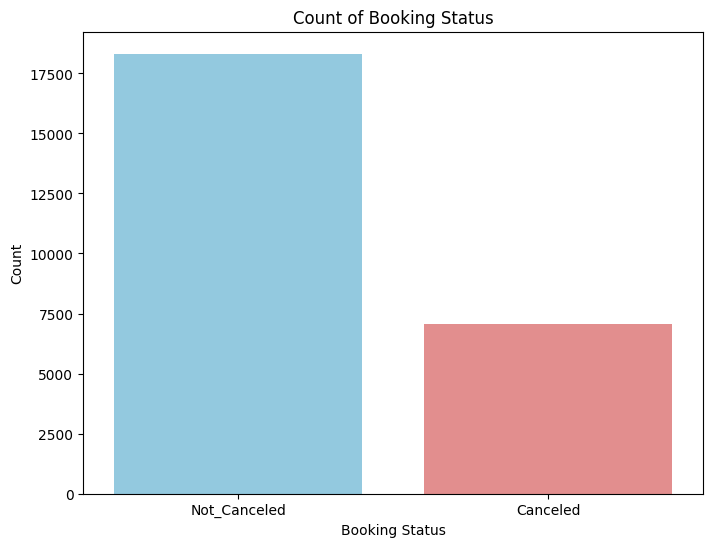

In [ ]:

booking_status_counts = data['booking_status'].value_counts()

print(booking_status_counts)


# Visualize using a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='booking_status', data=data, palette=['skyblue', 'lightcoral'])
plt.title("Count of Booking Status")
plt.xlabel("Booking Status")
plt.ylabel("Count")
plt.show()


While the majority of guests proceed with their bookings, it's concerning that nearly 40%—around 40 out of 100—opt for cancellations. This proportion indicates a significant number of guests experiencing a change in plans or potentially dissatisfied with their reservations

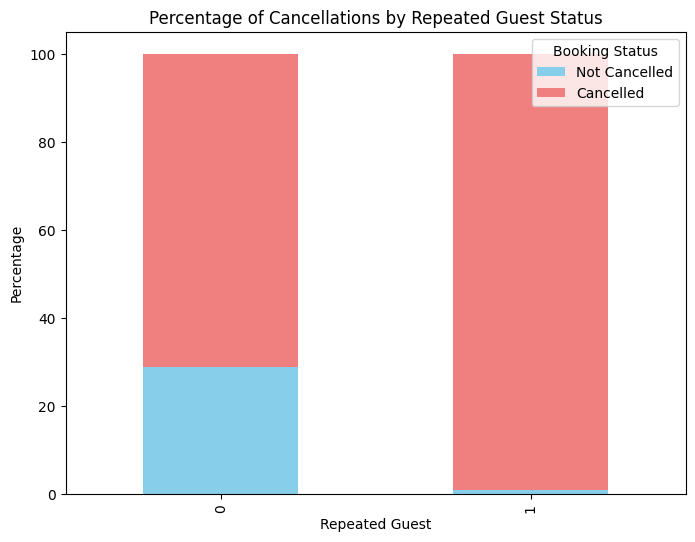

In [ ]:
cancellation_percentages = data.groupby('repeated_guest')['booking_status'].value_counts(normalize=True).unstack() * 100

# Visual representation - Stacked bar chart
cancellation_percentages.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'], figsize=(8, 6))
plt.title("Percentage of Cancellations by Repeated Guest Status")
plt.xlabel("Repeated Guest")
plt.ylabel("Percentage")
plt.legend(title="Booking Status", loc='upper right', labels=['Not Cancelled', 'Cancelled'])
plt.show()


**Observation:**

The graph illustrates a noteworthy trend where repeated guests exhibit cancellations for their subsequent bookings. This suggests the possibility that these guests may have encountered shortcomings in services or facilities during their previous stays.

**Interpretation:**

The observed pattern raises a concern regarding the satisfaction of repeated guests. It implies that certain aspects of their prior experiences might not have met expectations, leading to cancellations for future reservations.

**Consideration:**

To address this trend, the hotel should conduct a thorough review of services and facilities, seeking feedback from repeated guests. Understanding and rectifying any shortcomings can not only retain existing patrons but also enhance the overall reputation and appeal of the hotel.

Acknowledging and proactively addressing the concerns of repeated guests is crucial for maintaining loyalty and ensuring a positive guest experience.



#Does price affect the room choice?

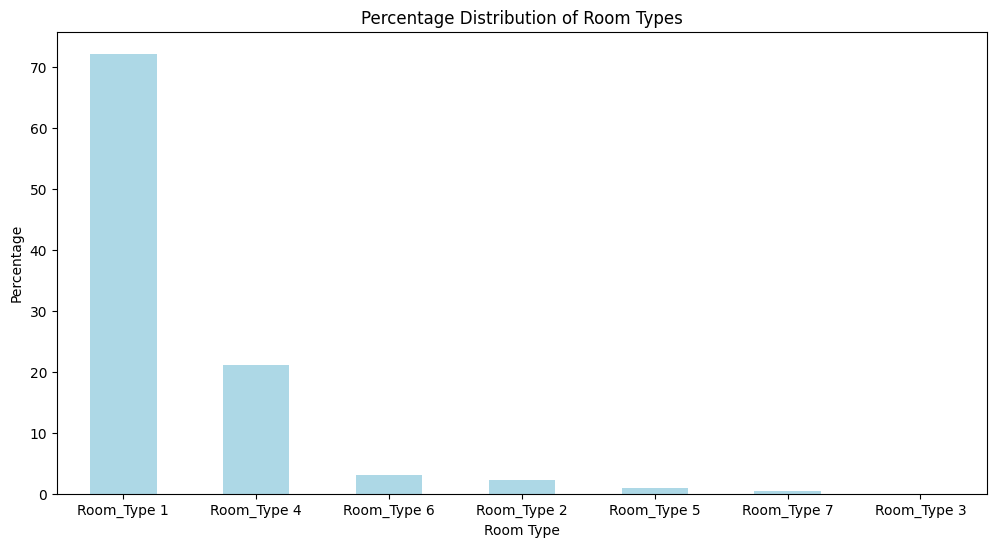

In [ ]:
room_type_distribution = data['room_type_reserved'].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 6))
# Plotting a bar chart for visualization
room_type_distribution.plot(kind='bar', color='lightblue')
plt.title("Percentage Distribution of Room Types")
plt.xlabel("Room Type")
plt.ylabel("Percentage")
plt.xticks(rotation=0)

plt.show()

**Observartion** :

Room Type 1 is the most preffered room

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['avg_price_per_room'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Average Price per Room")
plt.xlabel("Average Price per Room")
plt.ylabel("Frequency")
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='room_type_reserved', y='avg_price_per_room', data=data, palette='pastel')
plt.title("Room Type and Average Price per Room")
plt.xlabel("Room Type")
plt.ylabel("Average Price per Room")
plt.show()



**Observation:**

Room Type 2 emerges with the lowest pricing among the room categories, followed by Room Type 1, which represents the second most affordable option.

But Room type 1 is the most preffered room.


# Which meal plan is most preferred according to room type and avergae price of room ?


In [ ]:
meal_plan_distribution = data['type_of_meal_plan'].value_counts(normalize=True) * 100

print("Percentage distribution of meal plans:")
print(meal_plan_distribution)

meal_plan_distribution.plot(kind='bar')
plt.title("Percentage Distribution of Meal Plans")
plt.xlabel("Meal Plan Type")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.show()


>Meal Plan 1  is the one that most of the people like

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='room_type_reserved', y='avg_price_per_room', hue='type_of_meal_plan', data=data, palette='pastel')
plt.title("Room Type and Meal Plan vs Average Price per Room")
plt.xlabel("Room Type")
plt.ylabel("Average Price per Room")
plt.legend(title="Meal Plan", loc='upper right')
plt.show()

Usually, people are seen prefering Meal Plan 2 but incase of room type 3,6 and 7 people seem to  like Meal Plan 1 more.


# What is booking status based on market segemnt?

In [ ]:
data["market_segment_type"].unique()

In [ ]:
segment_counts = data['market_segment_type'].value_counts()


most_booked_segment = segment_counts.idxmax()


print(f"The market segment with the highest number of bookings is: {most_booked_segment}")


In [ ]:
plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar', color='skyblue')
plt.title("Market Segment Distribution of Bookings")
plt.xlabel("Market Segment")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=0)
plt.show()


In [ ]:
print("Percentage distribution of market segment:")
print(segment_counts)

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='market_segment_type', hue='booking_status', data=data)
plt.title('Booking Status by Market Segment Type')
plt.xlabel('Market Segment Type')
plt.ylabel('Count')
plt.show()

The analysis indicates that the highest number of bookings is observed in the 'Online' market segment. However, it is noteworthy that this segment also exhibits a higher likelihood of cancellations compared to other market segments.

# What type of room and price is most preferred by market segment?

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='room_type_reserved', y='avg_price_per_room', hue='market_segment_type', data=data, palette='pastel')
plt.title("Room Type and Market Segment vs Average Price per Room")
plt.xlabel("Room Type")
plt.ylabel("Average Price per Room")
plt.legend(title="Market Segment", loc='upper right')
plt.show()



**Insight:**

The data strongly suggests that most guests prefer booking rooms online. This inclination hints at the hotel's strategic location, possibly near a busy road or in a lively city. The popularity of online booking reflects the modern traveler's desire for swift and accessible reservation options.

**Implication:**

The hotel's success in online bookings indicates that its location is likely convenient for guests seeking easy access. Being close to major roads or in a bustling city center enhances the appeal of the hotel for those who value quick and straightforward reservation processes.

**Recommendation:**

To capitalize on this trend, the hotel can focus on maintaining and improving its online presence. Ensuring a hassle-free online booking experience and highlighting the hotel's proximity to key areas can further attract guests seeking simplicity and convenience.

Understanding and embracing this preference for online bookings can contribute to the hotel's popularity and guest satisfaction.



# Booking Status Based on Arrival Month



In [ ]:
data["arrival_month"].unique()

In [ ]:
month_counts = data['arrival_month'].value_counts()

print("Number of bookings for each month:")
print(month_counts)

In [ ]:

#Visualization through line graph
plt.figure(figsize=(10, 6))
plt.plot(month_counts.sort_index(), marker='o', color='skyblue', linestyle='-')
plt.title("Arrival Month Distribution")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.xticks(month_counts.sort_index().index, rotation=0)
plt.grid(True)
plt.show()

**Observation**:



10: October

In October guests vist more compared to other months

In [ ]:
# Assuming 'data' is your DataFrame
plt.figure(figsize=(12, 6))
sns.countplot(x='arrival_month', hue='booking_status', data=data, palette='coolwarm')
plt.title('Booking Status by Arrival Month')
plt.xlabel('Arrival Month')
plt.ylabel('Count')
plt.show()

# Do people prefer weekends or weekdays?


In [ ]:
weekend_bookings = data[data['no_of_weekend_nights'] > 0]

num_weekend_bookings = len(weekend_bookings)

print(f"The number of people who made bookings for weekends is: {num_weekend_bookings}")

In [ ]:
weekday_bookings = data[data['no_of_week_nights'] > 0]

num_weekday_bookings = len(weekday_bookings)

print(f"The number of people who made bookings for weekdays is: {num_weekday_bookings}")



In [ ]:
num_weekday_bookings = len(weekday_bookings)
num_weekend_bookings = len(weekend_bookings)

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Weekdays', 'Weekends'], y=[num_weekday_bookings, num_weekend_bookings], palette='pastel')
plt.title("Comparison of Weekday and Weekend Bookings")
plt.xlabel("Type of Booking")
plt.ylabel("Number of Bookings")
plt.show()

**Observation:**

The data indicates a preference among guests for weekday bookings over weekends. This suggests that a significant portion of guests tends to choose accommodations for stays during Monday to Friday rather than on weekends.


To capitalize on this preference, the hotel might consider developing targeted promotions, discounts, or packages specifically tailored for weekday stays. This approach can not only enhance guest satisfaction but also contribute to optimizing occupancy rates during weekdays.



The boxplot analysis indicates a clear trend — as lead time decreases, the likelihood of cancellations also decreases.

**Recommendation :**


The hotel could consider implementing proactive communication strategies for guests with shorter lead times. This might include reaching out to guests to confirm their bookings, offer personalized updates, or inquire about any specific preferences or requirements

# How does lead time impact the type of room,booking status and average price?

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your existing code
plt.figure(figsize=(12, 8))
sns.scatterplot(x='lead_time', y='avg_price_per_room', hue='booking_status', style='room_type_reserved', size='room_type_reserved', sizes=(50, 200), data=data, palette=['skyblue', 'lightcoral'])
plt.title("Lead Time vs Room Type vs Price vs Booking Status")
plt.xlabel("Lead Time (days)")
plt.ylabel("Average Price per Room")
plt.legend(title="Booking Status", loc='upper right')


sns.regplot(x='lead_time', y='avg_price_per_room', data=data, scatter=False, color='black')

plt.show()


> As the lead time increases there is more cancellation seen .


>Mostly,Room Type 1 is prefferd.


**Conclusion**

1. **Booking Patterns:**
   - Widely used online booking platform.
   - Preference for rooms price 60-120

2. **Room Types and Meal Plans:**
   - Most rooms prefer Meal Plan 1 whereas 3 of the room type choose Meal plan 2.
   

3. **Lead Time and Cancellations:**
   - Cancellations rise with increased lead time.
   - Suggests managing bookings within 120 days for efficiency.

4. **Customer Retention Opportunities:**
   - Lack of repeated bookings suggests an opportunity.
   - Potential for customer retention and loyalty programs.

5. **Online Booking Insights:**
   - High volume but notable cancellations.
   - Other segments show stability with fewer cancellations.


